In [ ]:
# data => Social_Network_Ads.csv
# location => https:// mitu.co.in/dataset

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [176]:
df.shape

(400, 5)

In [177]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [178]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [179]:
# seprate input and output data

In [180]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [181]:
x;

In [182]:
# check for Linearity

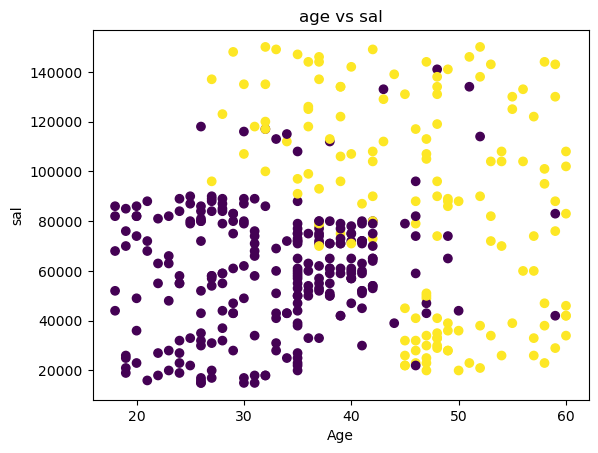

In [183]:
plt.title("age vs sal")
plt.xlabel('Age')
plt.ylabel('sal')
plt.scatter(x['Age'], x['EstimatedSalary'], c = df['Purchased']);

In [184]:
# cross validation

In [186]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [187]:
x_train.shape, y_train.shape

((300, 2), (300,))

In [188]:
x_test.shape, y_train.shape

((100, 2), (300,))

In [189]:
x

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [116]:
# features scaling -> normilization

In [117]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()

In [118]:
x_train_scaled = sca.fit_transform(x_train)
x_test = sca.transform(x_test)

In [119]:
# build the model

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
log = LogisticRegression()

In [122]:
log.fit(x_train_scaled, y_train)

LogisticRegression()

In [123]:
# evaluate

In [126]:
y_pred = log.predict(x_test)

In [127]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [128]:
# create a dataframe fornactual and predicted

In [131]:
result = pd.DataFrame({
    "actual": y_test,
    "predicted": y_pred
})
result

,actual,predicted
370,1,1
248,0,0
212,0,1
195,0,0
14,0,0
...,...,...
327,0,0
22,1,0
278,1,1
397,1,0


In [132]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,accuracy_score

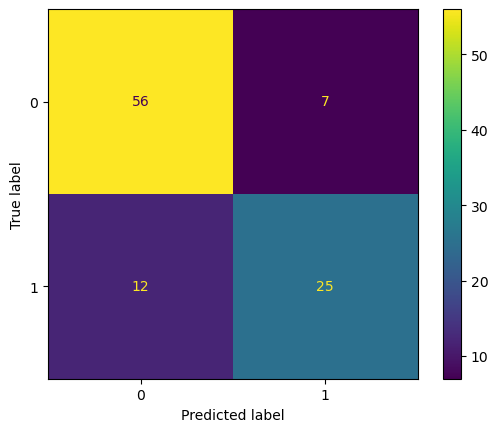

In [133]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [134]:
print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        63
           1       0.78      0.68      0.72        37

    accuracy                           0.81       100
   macro avg       0.80      0.78      0.79       100
weighted avg       0.81      0.81      0.81       100



In [143]:
recall = 67 / 68 # recall

# out of total 0 in the data how many model predicted
recall

0.9852941176470589

In [144]:
precision = 67 / 77 # precision

# out of 0 predicted by model how many are correct
precision

0.8701298701298701

In [145]:
(2 * recall * precision)/ (recall + precision)
# harmonic mean of precision and recall

0.9241379310344828

In [146]:
# actually accuracy
accuracy_score(y_test, y_pred)

0.81

In [147]:
# roc_acu

In [152]:
from sklearn.metrics import roc_auc_score, roc_curve

In [160]:
y_pred_prob = log.predict_proba(x_test)

In [161]:
roc_auc_score(y_test, y_pred_prob[:,1])

0.9212784212784213

In [ ]:
roc_curve(y_test, y_pred_prob)

In [ ]:
fpr,tpr,threshold = roc_curve(y_test, y_pred_prob)

In [ ]:
plt.title("AUC curve")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr,tpr, color = 'red', label = auc)
plt.plot([0, 1], [0, 1], label = 'random model', ls = '--')
plt.grid();
plt.legend();

In [191]:
# threshold tuning

In [ ]:
log.predict_proba(x_test_scaled);

In [ ]:
y_pred_prob;

In [ ]:
threshold = 0.7
y_pred_new = (y_pred_prob > threshold).astype(int)

In [ ]:
y_pred_new